In [2]:
import os
import platform

from IPython.display import clear_output
print(platform.platform())

def resolve_dir(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)

def reset_path(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)
    else:
        os.system('rm -f {}/*'.format( Dir))

Windows-11-10.0.22631-SP0


In [3]:
import cv2
import os

# Path to the directory containing videos
video_dir = "C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001"


# List to store all video paths
video_paths = []

# Loop through each video file in the directory
for filename in os.listdir(video_dir):
    if filename.endswith('.mp4') or filename.endswith('.avi'):
        # Append the video path to the list
        video_paths.append(os.path.join(video_dir, filename))

# Now you have all video paths in the 'video_paths' list
# You can then loop through this list and load each video for further processing
for video_path in video_paths:
    # Load video
    cap = cv2.VideoCapture(video_path)

    # Read frames
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Process frame (e.g., display, analyze)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [4]:
import tensorflow as tf

def setup_tensorflow(seed=73, use_tpu=False):
    # Set random seed
    tf.random.set_seed(seed)

    if use_tpu:
        try:
            # Connect to TPU cluster resolver
            tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
            # Initialize TPU strategy
            tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
        except ValueError:
            raise BaseException('ERROR: Not connected to a TPU runtime!')
    else:
        # Execute nvidia-smi command directly in Jupyter Notebook
        !nvidia-smi

    # Print TensorFlow version
    print("TensorFlow version:", tf.__version__)

# Call the function to set up TensorFlow
setup_tensorflow(seed=73, use_tpu=False)



Mon May  6 10:59:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8               6W /  50W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src
    return HTML(html)

In [6]:
# Assuming you want to play the video using OpenCV
import cv2

# Define the path to the video file
video_path = 'C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset\\Violence\\V_4.mp4'

# Create a VideoCapture object to read the video
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
else:
    # Loop through the video frames and display them
    while True:
        ret, frame = cap.read()  # Read a frame from the video
        if not ret:  # If no frame is read (end of video)
            break
        cv2.imshow('Video', frame)  # Display the frame
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Check for 'q' key to quit
            break

    # Release the VideoCapture object and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [7]:
# Assuming you want to play the video using OpenCV
import cv2

# Define the path to the video file
video_path = 'C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset\\NonViolence\\NV_3.mp4'

# Create a VideoCapture object to read the video
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
else:
    # Loop through the video frames and display them
    while True:
        ret, frame = cap.read()  # Read a frame from the video
        if not ret:  # If no frame is read (end of video)
            break
        cv2.imshow('Video', frame)  # Display the frame
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Check for 'q' key to quit
            break

    # Release the VideoCapture object and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [8]:
import cv2
import os
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

IMG_SIZE = 128
ColorChannels = 3

def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)

    import math
    rate = math.floor(vidcap.get(3))
    count = 0

    ImageFrames = []
    while vidcap.isOpened():
        ID = vidcap.get(1)
        success, image = vidcap.read()

        if success:
            # skipping frames to avoid duplications
            if (ID % 7 == 0):
                flip = iaa.Fliplr(1.0)
                zoom = iaa.Affine(scale=1.3)
                random_brightness = iaa.Multiply((1, 1.3))
                rotate = iaa.Affine(rotate=(-25, 25))

                image_aug = flip(image = image)
                image_aug = random_brightness(image = image_aug)
                image_aug = zoom(image = image_aug)
                image_aug = rotate(image = image_aug)

                rgb_img = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(rgb_img, (IMG_SIZE, IMG_SIZE))
                ImageFrames.append(resized)

            count += 1
        else:
            break

    vidcap.release()

    return ImageFrames

In [9]:
%%time
from tqdm import tqdm
VideoDataDir = "C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset"
print('we have \n{} Violence videos \n{} NonViolence videos'.format(
              len(os.listdir(VideoDataDir + '/Violence')),
              len(os.listdir(VideoDataDir + '/NonViolence'))))

X_original = []
y_original = []

print('i choose 700 videos out of 2000, cuz of memory issue')
CLASSES = ["NonViolence", "Violence"]
#700 <- 350 + 350

for category in os.listdir(VideoDataDir):
    path = os.path.join(VideoDataDir, category)
    class_num = CLASSES.index(category)
    for i, video in enumerate(tqdm(os.listdir(path)[0:350])):
        frames = video_to_frames(path + '/' + video)
        for j, frame in enumerate(frames):
            X_original.append(frame)
            y_original.append(class_num)


we have 
1000 Violence videos 
968 NonViolence videos
i choose 700 videos out of 2000, cuz of memory issue


100%|████████████████████████████████████████████████████████████████████████████████| 350/350 [02:30<00:00,  2.32it/s]

CPU times: total: 1min 14s
Wall time: 3min 52s


In [10]:
import numpy as np
X_original = np.array(X_original).reshape(-1 , IMG_SIZE * IMG_SIZE * 3)
y_original = np.array(y_original)
len(X_original)

13625

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_sample = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=73)

for train_index, test_index in stratified_sample.split(X_original, y_original):
    X_train, X_test = X_original[train_index], X_original[test_index]
    y_train, y_test = y_original[train_index], y_original[test_index]

X_train_nn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
X_test_nn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255

In [19]:
!pip install imutils
clear_output()

In [30]:
import cv2
import os
import numpy as np
import pickle
import matplotlib
matplotlib.use("Agg")  # Set the backend before importing pyplot

from keras.layers import Input, Dropout, Flatten, Dense  # No need for 'core' in the import
from keras.models import Model
import matplotlib.pyplot as plt  # Import pyplot after setting the backend


In [29]:
epochs = 50

from keras import regularizers
from tensorflow.keras.layers import Input

kernel_regularizer = regularizers.l2(0.0001)

from keras.applications import MobileNetV2

def load_layers():
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    baseModel = MobileNetV2(pooling='avg',
                            include_top=False,
                            input_tensor=input_tensor)

    headModel = baseModel.output
    headModel = Dense(1, activation="sigmoid")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    print("Compiling model...")
    model.compile(loss="binary_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])

    return model
TPU_INIT = False

if TPU_INIT:
    with tpu_strategy.scope():
        model = load_layers()
else:
    model = load_layers()

model.summary()

C:\Users\prans\AppData\Local\Temp\ipykernel_12852\2754767533.py:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(pooling='avg',


Compiling model...


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [27]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

patience = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005

batch_size = 4

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True

In [31]:
end_callback = myCallback()

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

early_stopping = EarlyStopping(patience = patience, monitor='val_loss',
                                 mode='min', restore_best_weights=True,
                                 verbose = 1, min_delta = .00075)

PROJECT_DIR = "C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset"

lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

os.system('rm -rf ./logs/')

import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, write_graph=True, histogram_freq=1)

checkpoint_filepath = 'ModelWeights.weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)


callbacks = [end_callback, lr_callback, model_checkpoints, tensorboard_callback, early_stopping, lr_plat]

if TPU_INIT:
    callbacks = [end_callback, lr_callback, model_checkpoints, early_stopping, lr_plat]

In [24]:
print('Training head...')
#model.load_weights('./Model_Weights.h5')

history = model.fit(X_train_nn ,y_train, epochs=epochs,
                        callbacks=callbacks,
                        validation_data = (X_test_nn, y_test),
                        batch_size=batch_size)

print('\nRestoring best Weights for MobileNetV2')
model.load_weights(checkpoint_filepath)

Training head...
Epoch 1/50
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5648 - loss: 0.8416
Epoch 1: val_loss improved from inf to 0.66921, saving model to ModelWeights.weights.h5
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 103s 42ms/step - accuracy: 0.5648 - loss: 0.8416 - val_accuracy: 0.6470 - val_loss: 0.6692 - learning_rate: 1.0000e-05
Epoch 2/50
2384/2385 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6737 - loss: 0.6071
Epoch 2: val_loss improved from 0.66921 to 0.47498, saving model to ModelWeights.weights.h5
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 97s 41ms/step - accuracy: 0.6737 - loss: 0.6071 - val_accuracy: 0.7838 - val_loss: 0.4750 - learning_rate: 1.8000e-05
Epoch 3/50
2384/2385 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8040 - loss: 0.4415
Epoch 3: val_loss improved from 0.47498 to 0.36351, saving model to ModelWeights.weights.h5
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 96s 40ms/step - accuracy: 0.8040 - loss: 0.4415 - val_accuracy: 0.8525 - val_loss: 0.3635 - learning_rate: 2.6000e

In [32]:
%matplotlib inline

def print_graph(item, index, history):
    plt.figure()
    train_values = history.history[item][0:index]
    plt.plot(train_values)
    test_values = history.history['val_' + item][0:index]
    plt.plot(test_values)
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()
    plot = '{}.png'.format(item)
    plt.savefig(plot)


def get_best_epoch(test_loss, history):
    for key, item in enumerate(history.history.items()):
        (name, arr) = item
        if name == 'val_loss':
            for i in range(len(arr)):
                if round(test_loss, 2) == round(arr[i], 2):
                    return i

def model_summary(model, history):
    print('---'*30)
    test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)

    if history:
        index = get_best_epoch(test_loss, history)
        print('Best Epochs: ', index)

        train_accuracy = history.history['accuracy'][index]
        train_loss = history.history['loss'][index]

        print('Accuracy on train:',train_accuracy,'\tLoss on train:',train_loss)
        print('Accuracy on test:',test_accuracy,'\tLoss on test:',test_loss)
        print_graph('loss', index, history)
        print_graph('accuracy', index, history)
        print('---'*30)
        

------------------------------------------------------------------------------------------
Best Epochs:  49
Accuracy on train: 0.9558561444282532 	Loss on train: 0.13145044445991516
Accuracy on test: 0.9459393620491028 	Loss on test: 0.14465279877185822


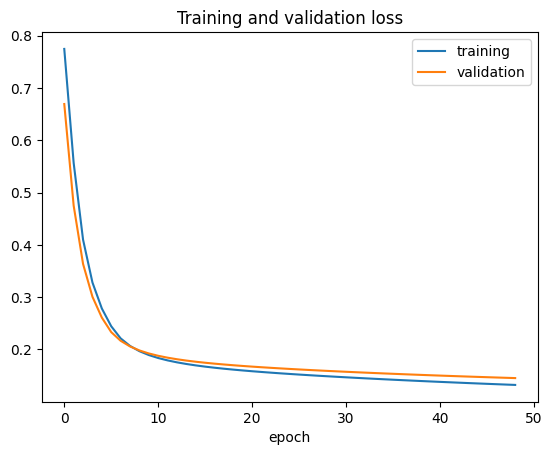

<Figure size 640x480 with 0 Axes>

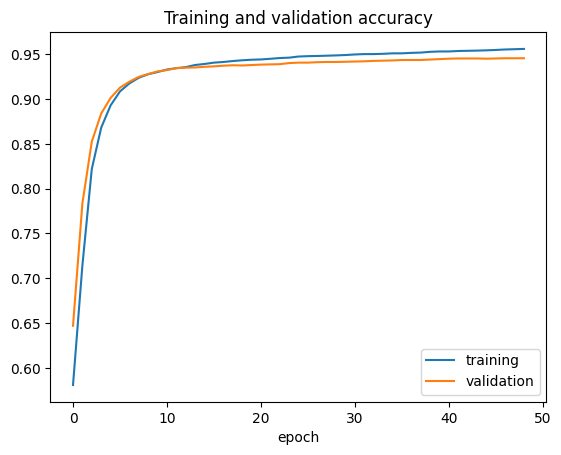

------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [26]:
model_summary(model, history)

In [35]:
# evaluate the network
print("Evaluating network...")
predictions = model.predict(X_test_nn)
preds = predictions > 0.5

Evaluating network...
128/128 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step


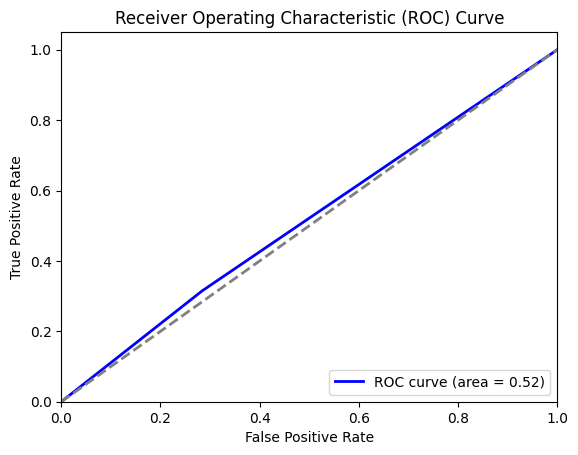

> Correct Predictions: 1958
> Wrong Predictions: 2130


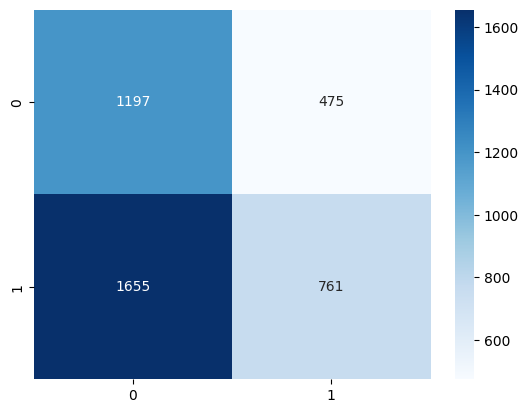

              precision    recall  f1-score   support

 NonViolence       0.42      0.72      0.53      1672
    Violence       0.62      0.31      0.42      2416

    accuracy                           0.48      4088
   macro avg       0.52      0.52      0.47      4088
weighted avg       0.54      0.48      0.46      4088



In [36]:
import seaborn as sns
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and preds are defined earlier
# Calculate confusion matrix
corr_pred = metrics.confusion_matrix(y_test, preds)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
auc_score = metrics.roc_auc_score(y_test, preds)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print accuracy metrics
print('> Correct Predictions:', np.sum(np.diag(corr_pred)))
print('> Wrong Predictions:', np.sum(corr_pred) - np.sum(np.diag(corr_pred)))

# Visualize confusion matrix
sns.heatmap(corr_pred, annot=True, fmt="d", cmap="Blues")
plt.show()

# Print classification report
print(metrics.classification_report(y_test, preds, target_names=["NonViolence", "Violence"]))


In [52]:
args_model = "model.h5"
model.save(args_model)

In [58]:
import numpy as np
import argparse
import pickle
import cv2
import os
import time
from keras.models import load_model
from collections import deque

def print_results(video, limit=None):
        fig=plt.figure(figsize=(16, 30))
        if not os.path.exists('output'):
            os.mkdir('output')

        print("Loading model ...")
        model = load_model('./model.h5')
        Q = deque(maxlen=128)

        vs = cv2.VideoCapture(video)
        writer = None
        (W, H) = (None, None)
        count = 0
        while True:
                (grabbed, frame) = vs.read()
                ID = vs.get(1)
                if not grabbed:
                    break
                try:
                    if (ID % 7 == 0):
                        count = count + 1
                        n_frames = len(frame)

                        if W is None or H is None:
                            (H, W) = frame.shape[:2]

                        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        output = cv2.resize(frame, (512, 360)).copy()
                        frame = cv2.resize(frame, (128, 128)).astype("float32")
                        frame = frame.reshape(IMG_SIZE, IMG_SIZE, 3) / 255
                        preds = model.predict(np.expand_dims(frame, axis=0))[0]
                        Q.append(preds)

                        results = np.array(Q).mean(axis=0)
                        i = (preds > 0.56)[0] #np.argmax(results)

                        label = i

                        text = "Violence: {}".format(label)
                        #print('prediction:', text)
                        file = open("output.txt",'w')
                        file.write(text)
                        file.close()

                        color = (0, 255, 0)

                        if label:
                            color = (255, 0, 0)
                        else:
                            color = (0, 255, 0)

                        cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
                                1, color, 3)


                        # saving mp4 with labels but cv2.imshow is not working with this notebook
                        if writer is None:
                                fourcc = cv2.VideoWriter_fourcc(*"MJPG")
                                writer = cv2.VideoWriter("output.mp4", fourcc, 60,
                                        (W, H), True)

                        writer.write(output)
                        #cv2.imshow("Output", output)

                        fig.add_subplot(8, 3, count)
                        plt.imshow(output)

                    if limit and count > limit:
                        break

                except:
                    break

        plt.show()
        print("Cleaning up...")
        if writer is not None:
            writer.release()
        vs.release()

In [63]:
Violence = "OneDrive/Desktop/random/violence test.mp4"



In [64]:
print_results(Violence, limit=30)

Loading model ...


<Figure size 1600x3000 with 0 Axes>

Cleaning up...


In [63]:
NonViolence = "C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset\\NonViolence\\NV_4.mp4"
play("C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset\\NonViolence\\NV_4.mp4")

Loading model ...


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


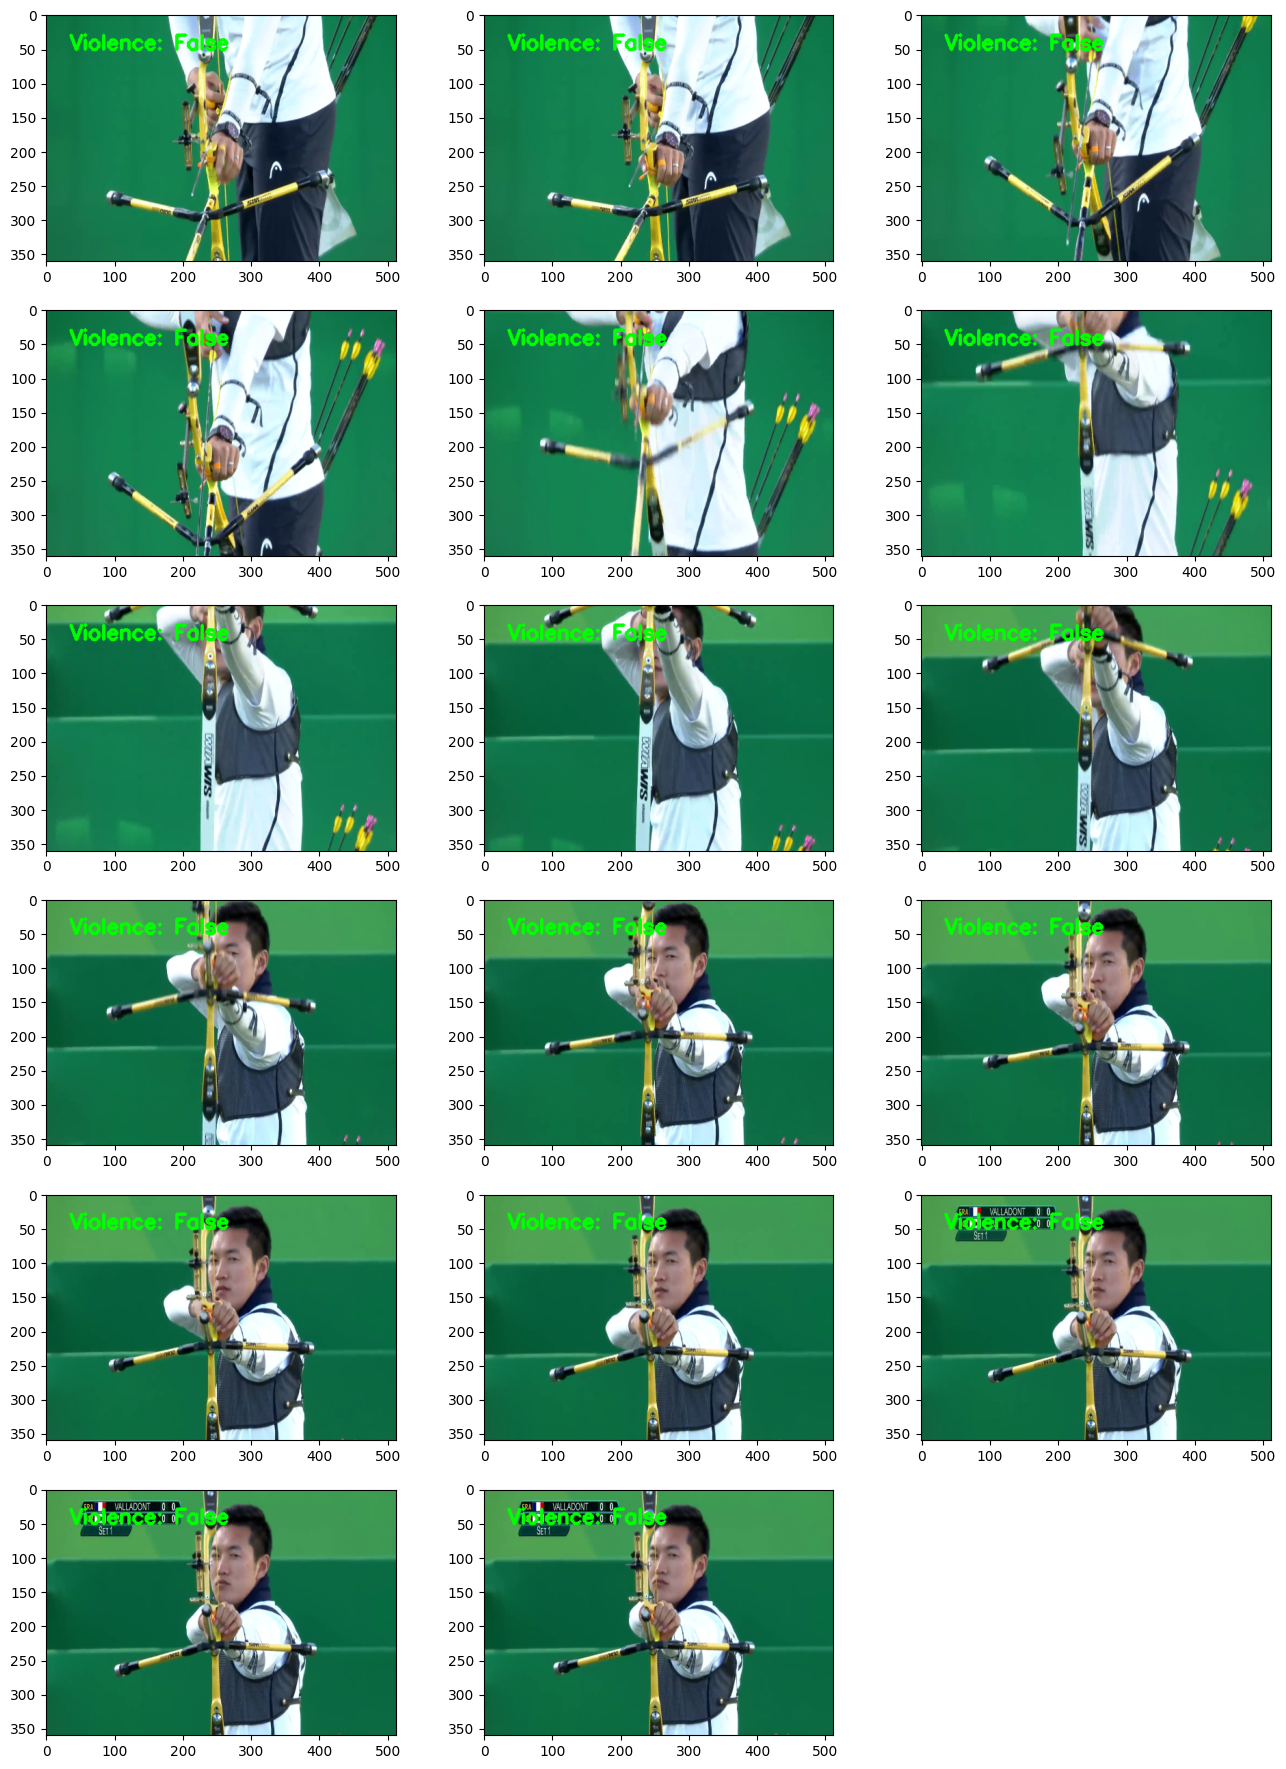

Cleaning up...


In [64]:
print_results(NonViolence, limit=50)

Loading model ...


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


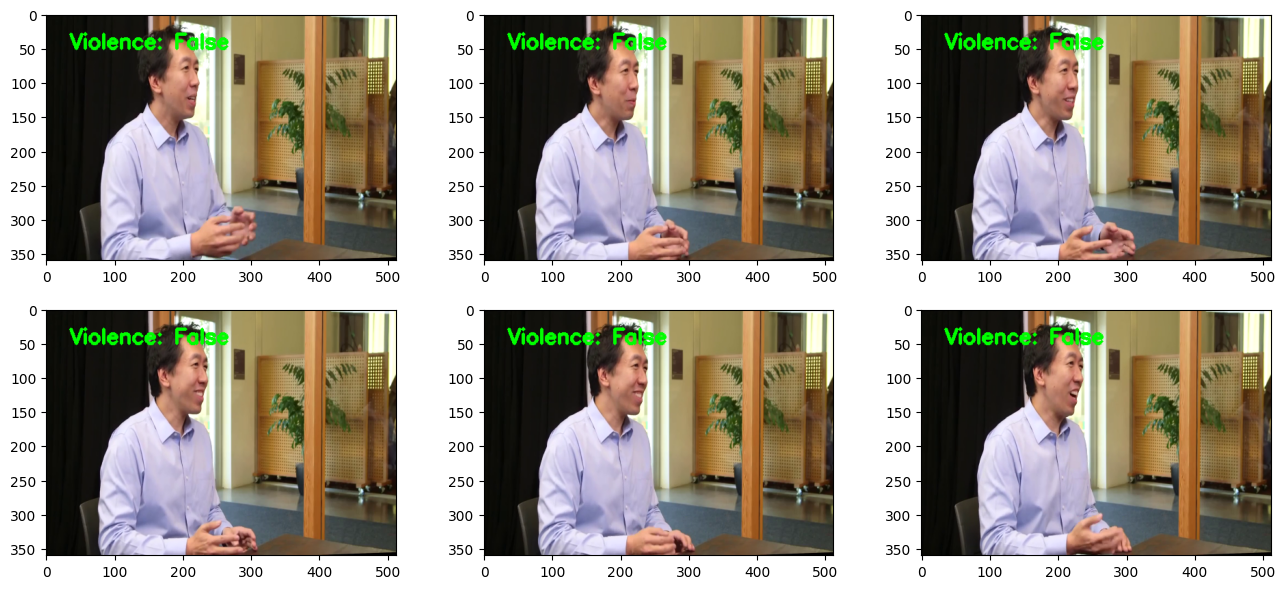

Cleaning up...


In [65]:
NonViolence="C:\\Users\\prans\\Downloads\\Real Life Violence Dataset-20240115T185530Z-001\\Real Life Violence Dataset\\NonViolence\\NV_999.mp4"
print_results(NonViolence, limit=5)

In [66]:
from IPython.display import FileLink
FileLink(r'./model.h5')

C:\Users\prans\OneDrive\Desktop\random\model.h5

In [51]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')


In [38]:
import cv2

def preprocess_video(video_path, target_size=(128, 128)):
    frames = []

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Read each frame from the video
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Resize frame to target size
        frame = cv2.resize(frame, target_size)
        
        # Convert color space from BGR to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Normalize pixel values to [0, 1]
        frame = frame / 255.0
        
        # Append preprocessed

In [39]:
preprocess_video("OneDrive/Desktop/random/violence test.mp4")

In [47]:
vl = "OneDrive/Desktop/random/violence test.mp4"

In [55]:

print_results(vl, limit=5)

Loading model ...


<Figure size 1600x3000 with 0 Axes>

Cleaning up...
